In [2]:
"""
Read and split ogb and planetoid datasets
"""

import os
import time

import torch
from torch.utils.data import DataLoader
from ogb.linkproppred import PygLinkPropPredDataset
from ogb.nodeproppred import PygNodePropPredDataset
from torch_geometric.data import Data
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.utils import (add_self_loops, negative_sampling,
                                   to_undirected)

from torch_geometric.loader import DataLoader as pygDataLoader
import wandb
from src.utils import ROOT_DIR, get_same_source_negs

# Cora

In [3]:
dataset_name = 'cora'
path = os.path.join(ROOT_DIR, 'dataset', dataset_name)
dataset = Planetoid(path, dataset_name)

In [4]:
dataset.data

/Users/chenshao/anaconda3/envs/ss/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [5]:
dataset.data.x.shape

torch.Size([2708, 1433])

/Users/chenshao/anaconda3/envs/ss/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


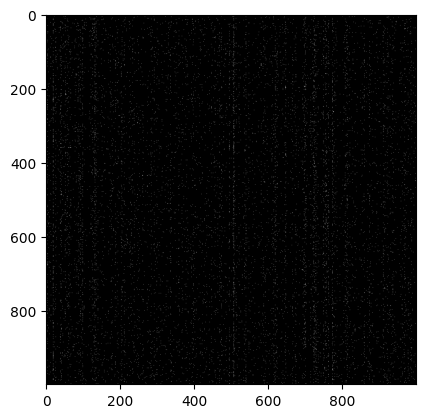

In [6]:
import matplotlib.pyplot as plt 
plt.imshow(dataset.data.x[:1000, :1000], cmap='grey')
plt.show()

In [7]:
dataset.data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [8]:
dataset.data.y

tensor([3, 4, 4,  ..., 3, 3, 3])

In [9]:
transform = RandomLinkSplit(is_undirected=True, num_val=0.1, num_test=0.2,
                            add_negative_train_samples=True)
train_data, val_data, test_data = transform(dataset.data)

In [10]:
train_data

Data(x=[2708, 1433], edge_index=[2, 7392], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_label=[7392], edge_label_index=[2, 7392])

In [11]:
train_data.edge_label_index

tensor([[1969,  530, 1692,  ..., 1139, 1453,  942],
        [2238, 1505, 2187,  ..., 1423,  551,  103]])

In [12]:
train_data.edge_label

tensor([1., 1., 1.,  ..., 0., 0., 0.])

# Pubmed

In [13]:
dataset_name = 'pubmed'
path = os.path.join(ROOT_DIR, 'dataset', dataset_name)
dataset = Planetoid(path, dataset_name)

In [14]:
transform = RandomLinkSplit(is_undirected=True, num_val=0.1, num_test=0.2,
                            add_negative_train_samples=True)
train_data, val_data, test_data = transform(dataset.data)

In [15]:
train_data

Data(x=[19717, 500], edge_index=[2, 62056], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717], edge_label=[62056], edge_label_index=[2, 62056])

In [16]:
dataset_name = 'Citeseer'
path = os.path.join(ROOT_DIR, 'dataset', dataset_name)
dataset = Planetoid(path, dataset_name)
transform = RandomLinkSplit(is_undirected=True, num_val=0.1, num_test=0.2,
                            add_negative_train_samples=True)
train_data, val_data, test_data = transform(dataset.data)

In [17]:
use_lcc_flag = False
dataset = PygLinkPropPredDataset(name='ogbl-collab', root=path)

In [18]:
dataset.data.edge_weight

/Users/chenshao/anaconda3/envs/ss/lib/python3.9/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor([[2],
        [2],
        [1],
        ...,
        [1],
        [1],
        [1]])

In [19]:
split_edge = dataset.get_edge_split()
split_edge

{'train': {'edge': tensor([[150989, 224881],
          [150989, 224881],
          [180078, 199043],
          ...,
          [ 60425, 221741],
          [135758, 221741],
          [140614, 207232]]),
  'weight': tensor([2, 1, 1,  ..., 1, 1, 1]),
  'year': tensor([2004, 2002, 2015,  ..., 2006, 2006, 1984])},
 'valid': {'edge': tensor([[ 49077, 199043],
          [148278, 147915],
          [100860, 136989],
          ...,
          [145209,  15870],
          [ 32751,  15870],
          [ 32552,  15870]]),
  'weight': tensor([1, 1, 2,  ..., 1, 1, 1]),
  'year': tensor([2018, 2018, 2018,  ..., 2018, 2018, 2018]),
  'edge_neg': tensor([[ 38605,  43566],
          [213250, 225425],
          [132174, 208876],
          ...,
          [ 54891, 229399],
          [ 19173, 212241],
          [162412, 204275]])},
 'test': {'edge': tensor([[112509, 220958],
          [  2599, 186854],
          [100860, 136989],
          ...,
          [ 47058, 190305],
          [216257, 190305],
          

In [20]:
use_lcc_flag = False
dataset = PygNodePropPredDataset(name='ogbn-arxiv', root=path)

In [22]:
split_edge = dataset.get_idx_split()

In [23]:
split_edge

{'train': tensor([     0,      1,      2,  ..., 169145, 169148, 169251]),
 'valid': tensor([   349,    357,    366,  ..., 169185, 169261, 169296]),
 'test': tensor([   346,    398,    451,  ..., 169340, 169341, 169342])}